<a href="https://colab.research.google.com/github/DeuklyoungKo/DeepLearningWithPytorch/blob/main/chap04_03_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import torch
from matplotlib import pyplot as plt


x = torch.FloatTensor(range(5)).unsqueeze(1)
b1 = torch.rand(5,1)
# b1 = (torch.ones(5,1)*2).view(-1,1)
# b1 = 8
y = 2*x + b1
num_features = x.shape[1]
print(x)
print(y)
print(b1)
print(x.shape)
print(num_features)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
tensor([[0.8467],
        [2.5953],
        [4.1140],
        [6.6236],
        [8.8345]])
tensor([[0.8467],
        [0.5953],
        [0.1140],
        [0.6236],
        [0.8345]])
torch.Size([5, 1])
1


In [89]:
# b1 = (torch.ones(5,1)*2).view(-1,1)
# b1

In [90]:
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)


tensor([[-0.1101]], requires_grad=True)
tensor([-0.6185], requires_grad=True)


In [91]:







learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b], lr=learning_rate)

loss_stack = []
for epoch in range(10001):
  optimizer.zero_grad()
  y_hat = torch.matmul(x,w)+b
  loss = torch.mean((y_hat-y)**2)
  loss.backward()
  optimizer.step()
  loss_stack.append(loss.item())

  if epoch % 100 == 0:
    print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:38.59070587158203
Epoch 100:2.712789297103882
Epoch 200:0.2929235100746155
Epoch 300:0.12507040798664093
Epoch 400:0.10931931436061859
Epoch 500:0.10430464893579483
Epoch 600:0.10045738518238068
Epoch 700:0.09708381444215775
Epoch 800:0.09409273415803909
Epoch 900:0.09143850207328796
Epoch 1000:0.0890830010175705
Epoch 1100:0.08699267357587814
Epoch 1200:0.08513752371072769
Epoch 1300:0.0834912583231926
Epoch 1400:0.0820302814245224
Epoch 1500:0.08073379099369049
Epoch 1600:0.07958311587572098
Epoch 1700:0.07856208831071854
Epoch 1800:0.0776558592915535
Epoch 1900:0.07685168832540512
Epoch 2000:0.07613807916641235
Epoch 2100:0.07550471276044846
Epoch 2200:0.0749426931142807
Epoch 2300:0.07444392889738083
Epoch 2400:0.07400129735469818
Epoch 2500:0.07360844314098358
Epoch 2600:0.07325983792543411
Epoch 2700:0.07295054197311401
Epoch 2800:0.0726759135723114
Epoch 2900:0.07243228703737259
Epoch 3000:0.07221617549657822
Epoch 3100:0.07202431559562683
Epoch 3200:0.07185401022434235


In [92]:
print(w)
print(b)
with torch.no_grad():
  y_hat = torch.matmul(x,w)+b

tensor([[2.0008]], requires_grad=True)
tensor([0.6009], requires_grad=True)


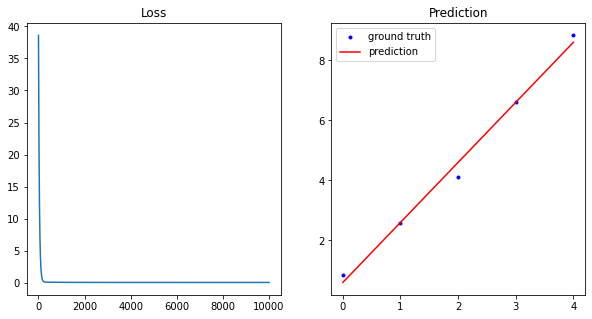

In [93]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()